<h1 style='color: purple; font-weight: bold;'>DoorDash Stock Analysis (Group N)</h1>


As a team of data analysts, we have generated visualizations of the stock price alongside its technical indicators. This provides intuitive insight into how DASH's price and volume have evolved over time. We plotted the close prices, SMA, and Bollinger Bands to visualize stock performance. Volume and volatility are added as subplots to provide a more complete market view.

As the first step of our analysis, we imported the necessary Python libraries (`pandas`, `numpy`, and `matplotlib.pyplot`) to support data manipulation and visualization. We then loaded the historical stock data for DoorDash from the provided CSV file `DASH_A1.csv` into a pandas DataFrame using `pd.read_csv()`. 

Displaying the DataFrame confirms successful loading and gives us a first look at the structure of the dataset, which contains 1,184 rows and 6 columns, including a `Date` column that will later need to be parsed as a datetime object for time series analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DASH_A1.csv")
df

,Date,Close,High,Low,Open,Volume
0,24-02-2022,100.419998,100.919998,85.177002,86.879997,6639000.0
1,01-08-2024,108.199997,112.769997,105.905998,108.620003,7965400.0
2,11-02-2025,193.089996,194.000000,189.500000,190.919998,6771900.0
3,13-04-2021,149.460007,150.360001,143.550003,146.839996,2823500.0
4,17-09-2024,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...,...
1179,27-11-2024,178.440002,180.179993,177.699997,179.990005,2031100.0
1180,12-02-2025,200.889999,201.169998,195.197998,198.000000,9989400.0
1181,01-04-2025,182.419998,183.014999,178.259995,182.050003,3740700.0
1182,25-03-2024,137.820007,138.899994,136.740005,137.050003,2162800.0


**Data Viewing and Preprocessing**

For easy reading, we changed the format of the `Date` which could be quickly indexed. This allowed us to view and and process the data more efficiently.

In [3]:
df.Date = pd.to_datetime(df.Date, format="%d-%m-%Y")
df.set_index("Date", inplace=True)
df


,Close,High,Low,Open,Volume
Date,,,,,
2022-02-24,100.419998,100.919998,85.177002,86.879997,6639000.0
2024-08-01,108.199997,112.769997,105.905998,108.620003,7965400.0
2025-02-11,193.089996,194.000000,189.500000,190.919998,6771900.0
2021-04-13,149.460007,150.360001,143.550003,146.839996,2823500.0
2024-09-17,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...
2024-11-27,178.440002,180.179993,177.699997,179.990005,2031100.0
2025-02-12,200.889999,201.169998,195.197998,198.000000,9989400.0
2025-04-01,182.419998,183.014999,178.259995,182.050003,3740700.0


**Sorting the Dataset by Date**


Afterwards, we executed a necessary step a processing for preparing, transforming, or presenting the data analysis. To ensure the time series analysis is accurate, we sorted the dataset in ascending chronological order based on the `Date` column. This is essential for correctly applying rolling indicators such as moving averages, volatility, and momentum.

We first checked whether the current order of dates was already sorted using `df.index.is_monotonic_increasing`, then sorted the DataFrame in-place using `df.sort_index(inplace=True)` to avoid misaligned calculations in later stages of the analysis.

This step ensures that all indicators are applied to properly sequenced data from DoorDash's IPO in December 2020 through June 2025.

In [4]:
df.index.is_monotonic_increasing 
df.sort_index(inplace=True)  
df


,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


**Removing Duplicate Records**


To ensure the integrity of our dataset, we checked for and removed any duplicate rows. Duplicate entries can distort statistical analysis and affect the accuracy of time-series indicators. Using `df.duplicated().sum()`, we identified **50 duplicated rows** in the dataset.

We removed these duplicates with `df.drop_duplicates(inplace=True)` to avoid any skew in calculations such as moving averages, returns, and volatility. A final check confirmed that no duplicates remained, ensuring a clean foundation for the rest of the analysis.


In [5]:
df.duplicated().sum() 

df.drop_duplicates(inplace=True) 
df

df.duplicated().sum() 


np.int64(0)

**Identifying Missing Values**



To maintain data accuracy and ensure the integrity of our calculations, we conducted an initial assessment of missing values across all numerical columns using `df.isnull().sum()`. 

Understanding the location and scale of these gaps can be used for applying appropriate data cleaning strategies tailored to each variable. 


In [6]:
df.isnull().sum()

Close     23
High      24
Low       15
Open      15
Volume    26
dtype: int64

This revealed that the dataset contains:

- 23 missing values in `Close`
- 24 in `High`
- 15 each in `Low` and `Open`
- 26 in `Volume`


**Locating Rows with Missing Data**



After quantifying the total number of missing values per column, we identified the exact rows that contain at least one missing entry. This was done using the combined condition `df.isnull().any(axis=1)`, which checks each row for any null values across all columns.


In [7]:
condition = df.isnull().any(axis=1)
df[condition]

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-17,154.210007,161.660004,NaN,159.100006,6369800.0
2021-01-13,NaN,215.500000,188.070007,192.410004,6058800.0
2021-02-05,NaN,190.916000,180.244995,189.570007,1521400.0
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN
...,...,...,...,...,...
2025-04-11,180.490005,NaN,173.809998,178.520004,3451700.0
2025-04-25,187.759995,191.100006,NaN,187.220001,4515100.0
2025-05-01,196.199997,197.750000,NaN,194.404999,4151600.0


## <h2 style="color: green"> **Data Cleaning** </h2>

We adheres to the following professional data cleaning rules for different missing values to
ensure the integrity and consistency of our financial data.


### <span style="color: orange;">1 - Open Price</span>


According to our firm’s data cleaning policy, **missing values in the `Open` column are filled with the `Close` price from the previous trading day**, as an approximation. This method assumes continuity between sessions while ignoring overnight trading volatility, a practical compromise in financial datasets where gaps are handled without introducing forward-looking bias.

In [8]:
df['Open'] = df['Open'].fillna(df['Close'].shift(1))
df.isnull().sum()

Close     23
High      24
Low       15
Open       0
Volume    26
dtype: int64

### <span style="color: orange;">2 - Close Price</span>



To comply with our firm's best practices for financial data handling, we addressed missing values in the `Close` column using a **forward-fill method** (`.ffill()`). This approach fills each missing value with the most recent known price, avoiding the introduction of future information that could lead to look-ahead bias.

This allowed us to preserve the temporal integrity of the dataset and ensured that all `Close` values are now complete and ready for further analysis.


In [9]:
df['Close'] = df['Close'].ffill()
df.isnull().sum()

Close      0
High      24
Low       15
Open       0
Volume    26
dtype: int64

### <span style="color: orange;">3 - High and Low Price</span>



To address missing values in the `High` and `Low` columns, we applied the firm’s monthly-mean policy: each missing value was filled using the **mean of the respective column within the same calendar month**.

This approach ensures consistency with market behavior over time and helps retain realistic trading ranges for that period. We first created a `Month` identifier using `df.index.to_period("M")`, then applied group-wise `.transform("mean")` to impute the gaps.


In [10]:
df["Month"] = df.index.to_period("M")
df

df["High"] = df["High"].fillna(df.groupby("Month")["High"].transform("mean"))
df["Low"] = df["Low"].fillna(df.groupby("Month")["Low"].transform("mean"))
df.isnull().sum()


Close      0
High       0
Low        0
Open       0
Volume    26
Month      0
dtype: int64


### <span style="color: orange;">4 - Volume (Zero Volume Condition)</span>

According to our firm’s guidelines, if the `Close` price is equal to the `Open` price and the `Volume` is missing, it is interpreted as **no trading activity** for that day. In such cases, we impute the missing `Volume` value as `0`.

This rule preserves data integrity without making speculative assumptions about volume fluctuations. We implemented this by locating rows where `Volume` is null and `Close == Open`, then assigned a value of zero. This reduced the number of remaining `Volume` nulls and addressed trading inactivity logically.

In [11]:
condition_equal = (df.Volume.isnull()) & (df.Close == df.Open)
df.loc[condition_equal, "Volume"] = 0

df.isnull().sum()

Close      0
High       0
Low        0
Open       0
Volume    25
Month      0
dtype: int64

### <span style="color: orange;">5 - Volume (Non-zero Volume Condition)</span>


For remaining rows where `Volume` was missing and the `Close` price was **not equal** to the `Open` price.

 If the `Close` price is not equal to the `Open` price, fill the missing values in the `Volume` column with the median of the existing `Volume` values. 

This strategy assumes that some trading activity occurred and avoids inflating or underestimating volume. The use of median is a central tendency estimation that avoids skewing the data with extreme values. 

In [12]:
condition_notequal = (df['Volume'].isnull()) & (df['Close'] != df['Open']) 
df.loc[condition_notequal, 'Volume'] = df['Volume'].median()

df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Month     0
dtype: int64

After applying all 5 of our data cleaning rules, we performed a final validation to ensure the dataset contains **no missing values**. We confirmed this by summing all `isnull()` results and checking the structure using `df.info()`.


In [13]:
df.isnull().sum().sum() # double check there is no missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   Close   1134 non-null   float64  
 1   High    1134 non-null   float64  
 2   Low     1134 non-null   float64  
 3   Open    1134 non-null   float64  
 4   Volume  1134 non-null   float64  
 5   Month   1134 non-null   period[M]
dtypes: float64(5), period[M](1)
memory usage: 62.0 KB


After we've resolved our missing numbers, we then can transform the trading volumes as integers.

In [14]:
df.Volume = df.Volume.astype("int64")
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   Close   1134 non-null   float64  
 1   High    1134 non-null   float64  
 2   Low     1134 non-null   float64  
 3   Open    1134 non-null   float64  
 4   Volume  1134 non-null   int64    
 5   Month   1134 non-null   period[M]
dtypes: float64(4), int64(1), period[M](1)
memory usage: 62.0 KB


### <span style="color: orange"><strong>Summary</strong></span>


The dataset now consists of **1,134 fully cleaned and chronologically ordered entries**, covering the period from **December 9, 2020 to June 13, 2025**. All missing values across the six core columns—`Open`, `High`, `Low`, `Close`, `Volume`, and `Month`—have been addressed in line with our firm’s data integrity standards.

With a complete and consistent time series in place, the dataset is now ready for feature engineering and technical analysis to support informed investment decision-making.

## <h2 style="color: green"> **Feature Engineering** </h2>

With a fully cleaned and chronologically ordered dataset, we now proceed to enhance its analytical depth through structured feature engineering. This step involves creating new columns that extract meaningful insights from existing data, following our firm’s standardized approach.

Rules for feature engineering are as follows:



### <span style="color: orange;">1 - Simple Daily Returns</span>

We calculated <span style="color: orange; font-weight: bold;">Simple Daily Returns</span> **using the percentage change in the `Close` prices from one trading day to the next**. This metric quantifies the day-to-day performance of the stock and forms the foundation for volatility, momentum, and return-based signals.

We implemented this using the `.pct_change()` method, which automatically computes the percentage change between consecutive rows. The resulting values were stored in a new column named `SimpleDailyReturns`.

This feature enables us to assess how frequently and to what extent DoorDash's stock price fluctuated on a daily basis, which is key to understanding both risk and trend behavior over time.


In [15]:
df["SimpleDailyReturns"] = df.Close.pct_change()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns
Date,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938
...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165


### <span style="color: orange;">2 - Logarithmic Returns</span>



To complement simple daily returns, we calculated <span style="color: orange; font-weight: bold;">Logarithmic Returns</span>  based on the `Close` prices. **Log returns** are often preferred in financial analysis due to their mathematical properties — especially their time-additivity and better handling of compounding effects.

This was implemented using the formula:  
$$
\text{Log Return}_t = \ln\left(\frac{\text{Close}_t}{\text{Close}_{t-1}}\right)
$$

Logarithmic returns are particularly useful to us for statistical modeling and are frequently used in risk management and portfolio optimization.


In [16]:
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns
Date,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521,-0.018695
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140,-0.060961
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714,-0.089612
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938,-0.006962
...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395,-0.004404
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587,-0.011654
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165,0.013079


### <span style="color: orange;">3 - 20-Day Momentum</span>


We computed the <span style="color: orange; font-weight: bold;">20-day Momentum</span>  by **subtracting the `Close` price from 20 trading days ago from the current day's `Close` price**. This metric helps assess the short-term directional trend of the stock, highlighting whether prices have generally increased or decreased over the past month.

This was implemented using the formula:

$$
\text{Momentum}_t = \text{Close}_t - \text{Close}_{t-20}
$$


The result is stored in a new column `20Day_Momentum`, where positive values indicate upward momentum and negative values indicate downward movement. 

In [17]:
df['20Day_Momentum'] = df['Close'] - df['Close'].shift(20)
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum
Date,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521,-0.018695,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140,-0.060961,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714,-0.089612,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938,-0.006962,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395,-0.004404,33.970001
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587,-0.011654,22.869995
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165,0.013079,20.000000


### <span style="color: orange;">4 - 20-Day Simple Moving Average</span>

To smooth out short-term price fluctuations and identify broader trends, we calculated the <span style="color: orange; font-weight: bold;">20-day Simple Moving Average </span> which is the **simple moving average of the `Close` prices**. This rolling average is a widely used technical indicator for assessing market direction over time.

We used the following formula:

$$
\text{SMA}_t^{(20)} = \frac{1}{20} \sum_{i=0}^{19} \text{Close}_{t-i}
$$


 This new column `20Day_SMA` helps highlight sustained price movements and is foundational for constructing other indicators like Bollinger Bands.

In [18]:
df['20Day_SMA'] = df['Close'].rolling(window=20).mean()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA
Date,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521,-0.018695,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140,-0.060961,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714,-0.089612,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938,-0.006962,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395,-0.004404,33.970001,206.409998
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587,-0.011654,22.869995,207.553498
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165,0.013079,20.000000,208.553498


### <span style="color: orange;">5 - 20-Day Rolling Volatility</span>

To measure the stock's short-term risk, we calculated the <span style="color: orange; font-weight: bold;">20-day Rolling Volatility</span>  using **the standard deviation of the simple daily returns**. This metric reflects how much the stock's price fluctuates over time and is widely used in portfolio risk assessment and volatility-based trading strategies.

We used the following formula:

$$
\text{Volatility}_t^{(20)} = \sqrt{\frac{1}{19} \sum_{i=0}^{19} \left( R_{t-i} - \bar{R}_{20} \right)^2}
$$

Where $R_{t-i}$ represents simple returns and $\bar{R}_{20}$ is the 20-day average return.

This feature helps us quantify how risky DoorDash stock has been on a rolling basis and is especially important when identifying stable vs. volatile periods.


In [19]:
df['20Day_Volatility'] = df['SimpleDailyReturns'].rolling(window=20).std()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility
Date,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521,-0.018695,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140,-0.060961,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714,-0.089612,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938,-0.006962,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395,-0.004404,33.970001,206.409998,0.017753
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587,-0.011654,22.869995,207.553498,0.015859
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165,0.013079,20.000000,208.553498,0.014953


### <span style="color: orange;">6 - Day of the Week</span>

To explore any potential calendar effects or weekly performance patterns, we extracted the <span style="color: orange; font-weight: bold;">Day of the Week </span> from the date index of the dataset. 
This feature creates a new column `Day_of_Week` with values such as `Monday`, `Tuesday`, etc., for each trading day. 

In [20]:
df['Day_of_Week'] = df.index.day_name()
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week
Date,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN,NaN,NaN,NaN,NaN,Wednesday
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521,-0.018695,NaN,NaN,NaN,Thursday
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140,-0.060961,NaN,NaN,NaN,Friday
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714,-0.089612,NaN,NaN,NaN,Monday
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938,-0.006962,NaN,NaN,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395,-0.004404,33.970001,206.409998,0.017753,Monday
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587,-0.011654,22.869995,207.553498,0.015859,Tuesday
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165,0.013079,20.000000,208.553498,0.014953,Wednesday


### <span style="color: orange;">7 - Price Surge Identification</span>

To identify days of exceptional positive performance, we flagged <span style="color: orange; font-weight: bold;">Price Surges</span> which are defined as days where the **simple daily return exceeds the mean by more than 4 standard deviations**. This highlights statistically rare upward movements, often linked to earnings beats, acquisitions, or major announcements.


This created a new boolean column `Price_Surge`, where `True` marks a detected surge. These events are extracted into `surge_days` for inspection which were suitable for highlighting abnormal return behavior.




In [21]:
mean_return = df['SimpleDailyReturns'].mean()
std_return = df['SimpleDailyReturns'].std()
df['Price_Surge'] = df['SimpleDailyReturns'] > (mean_return + 4 * std_return)
df

surge_days = df[df['Price_Surge'] == True]
surge_days

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week,Price_Surge
Date,,,,,,,,,,,,,
2021-01-12,191.990005,201.929993,162.615005,165.500000,7081800,2021-01,0.149641,0.139450,16.990005,154.739500,0.056770,Tuesday,True
2021-05-14,141.070007,146.630005,123.570000,125.000000,15264700,2021-05,0.221491,0.200072,-8.419998,138.449501,0.065840,Friday,True
2023-11-02,87.790001,90.339996,84.389999,85.089996,12346100,2023-11,0.156653,0.145531,13.980003,75.925500,0.045204,Thursday,True


### <span style="color: orange;">8 - Volume Spike Identification</span>


To detect days of **unusually high trading activity**, we flagged <span style="color: orange; font-weight: bold;">Volume Spikes</span> which are defined as days where the **trading volume exceeds the mean by more than 6 standard deviations**.


We then filtered those spike events into `unusualtrading_days` for closer inspection.

This feature helps us identify: 
- Days of significant institutional buying or selling  
- Market overreactions to news, earnings, or regulatory changes  


In [22]:
mean_volume = df['Volume'].mean()
std_volume = df['Volume'].std()
df['Volume_Spike'] = df['Volume'] > (mean_volume + 6 * std_volume)

unusualtrading_days = df[df['Volume_Spike'] == True]
unusualtrading_days

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week,Price_Surge,Volume_Spike
Date,,,,,,,,,,,,,,
2022-02-17,105.029999,116.000000,100.529999,115.600998,47405700,2022-02,0.106861,0.101528,-21.750000,103.309499,0.070378,Thursday,False,True
2023-12-15,101.570000,103.309998,100.220001,102.739998,30556000,2023-12,-0.001867,-0.001869,6.480003,97.266250,0.012769,Friday,False,True
2025-03-21,190.619995,194.399994,187.197006,190.720001,73637400,2025-03,-0.011973,-0.012045,-9.320007,189.258000,0.030139,Friday,False,True


### <span style="color: orange;">9 - Bollinger Bands Calculation</span>



To assess **overbought and oversold** conditions, we computed <span style="color: orange; font-weight: bold;">Bollinger Bands</span>, which consist of:

- An upper band = 20-day SMA + 2 × standard deviation  
- A lower band = 20-day SMA − 2 × standard deviation  

This method visually frames expected price movements within a volatility-adjusted envelope.

**Bollinger Bands help:**

- Identify breakouts or reversals near the bands  
- Detect periods of high or low volatility  


In [23]:
df['Dev'] = df['Close'].rolling(window=20).std()

df['Upper_BB'] = df['20Day_SMA'] + 2 * df['Dev']
df['Lower_BB'] = df['20Day_SMA'] - 2 * df['Dev']
df

,Close,High,Low,Open,Volume,Month,SimpleDailyReturns,Log_Returns,20Day_Momentum,20Day_SMA,20Day_Volatility,Day_of_Week,Price_Surge,Volume_Spike,Dev,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700,2020-12,NaN,NaN,NaN,NaN,NaN,Wednesday,False,False,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600,2020-12,-0.018521,-0.018695,NaN,NaN,NaN,Thursday,False,False,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600,2020-12,-0.059140,-0.060961,NaN,NaN,NaN,Friday,False,False,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600,2020-12,-0.085714,-0.089612,NaN,NaN,NaN,Monday,False,False,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000,2020-12,-0.006938,-0.006962,NaN,NaN,NaN,Tuesday,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300,2025-06,-0.004395,-0.004404,33.970001,206.409998,0.017753,Monday,False,False,7.886279,222.182556,190.637440
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700,2025-06,-0.011587,-0.011654,22.869995,207.553498,0.015859,Tuesday,False,False,7.341377,222.236252,192.870744
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500,2025-06,0.013165,0.013079,20.000000,208.553498,0.014953,Wednesday,False,False,7.304940,223.163377,193.943619


### <span style="color: orange"><strong>Summary</strong></span>

Through the structured application of our firm's feature engineering approach, we transformed the raw DoorDash stock data into a set of interpretable metrics and indicators, each offering distinct insights into performance, risk, and trading behavior.

- **Return behavior**
    - Simple and logarithmic returns confirmed significant volatility early in the stock's lifecycle, particularly post-IPO and during 2022 market-wide corrections.
    - Returns have since stabilized, with fewer large daily movements in the most recent year, suggesting increased investor confidence and pricing maturity.

- **Momentum and trends**
    - The 20-Day Momentum indicator surfaced multiple sustained upward and downward price phases, confirming that DoorDash stock does exhibit short-term trend behaviors.

- **Moving averages and volatility**
    - The 20-Day Simple Moving Average (SMA) provided a smooth trendline showing major directional shifts, particularly around earnings periods and broader tech sentiment changes.
    - The 20-Day Rolling Volatility confirmed periods of risk compression and expansion.Volatility spiked sharply during drawdowns in early 2022 and late 2023.The most recent months indicate reduced volatility.

- **Weekly behavior**
    - The Day of the Week feature open up analysis into whether certain trading days carry more risk or opportunity (e.g., earnings typically released on Thursdays affecting Friday behavior).

- **Price surges**
    - Only three days met the price surge condition (returns > 4 standard deviations above the mean).
    - These outliers reflect extraordinary optimism, possibly driven by strong earnings, market re-ratings, or strategic news.

- **Volume spikes**
    - Volume spikes were also rare — just three events — and represent unusual institutional flow or reactionary trading behavior.
    - These often occurred outside traditional earnings periods, implying the influence of external macro events or regulatory headlines.


Collectively, these engineered features provide a multi-dimensional view of DoorDash’s trading behavior. 


## <h2 style="color: green;"> **Key Dates**</h2>

With a fully engineered dataset in place, we now turn to identifying Key Dates within each calendar year. This process helps uncover significant events, outliers, or recurring patterns that may impact investment interpretation or strategy.

Following our firm’s policy, we highlight the most important daily events using the rules below. 

### <span style="color: orange;"> 1 - Highest Volatility Day</span>

To identify the most volatile trading day each year, we examined the `20Day_Volatility` column — a rolling standard deviation of daily returns — and located **the maximum value for each calendar year**.

1. First, we extracted the year from the datetime index using `df.index.year`.
2. We removed any missing values in the `20Day_Volatility` column with `dropna()`.
3. We used `groupby('Year')` and `.idxmax()` to find the row with the highest volatility per year.
4. Finally, we indexed into the original DataFrame to retrieve and display those key rows.

This method allows us to pinpoint when DoorDash experienced its greatest market uncertainty or reacted to major external/internal shocks. These peak volatility dates serve as markers of high-risk periods, useful for understanding investor sentiment, risk tolerance, and the broader context of price behavior. 

In [24]:
df['Year'] = df.index.year

df_vol = df.dropna(subset=['20Day_Volatility'])

date_vol_max = df_vol.groupby('Year')['20Day_Volatility'].idxmax()

highest_vol_days = df.loc[date_vol_max, ['Year', '20Day_Volatility']]

print("Highest Volatility Day per Year:")
print(highest_vol_days)


Highest Volatility Day per Year:
            Year  20Day_Volatility
Date                              
2021-05-20  2021          0.067393
2022-06-01  2022          0.080994
2023-11-06  2023          0.047470
2024-02-27  2024          0.033547
2025-04-10  2025          0.048324



<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>
- The most volatile year was 2022, with volatility of 0.080994 peaking on June 1st likely tied to macroeconomic instability or mid-year earnings volatility.


### <span style="color: orange;"> 2 - Largest Price Surge Day</span>

To identify the most significant single-day price increases each year, we used the `SimpleDailyReturns` column and extracted the date with **the highest positive return annually**.

By identifying the maximum positive return in each year, we were able to pinpoint the most explosive upside moves in DoorDash’s trading history.

1. First, we removed missing values from `SimpleDailyReturns` using `dropna()`.
2. We grouped the data by year and used `.idxmax()` to locate the date with the highest return.
3. We then selected those rows from the DataFrame for final output.


In [25]:
df_ret = df.dropna(subset=['SimpleDailyReturns'])

date_surge_max = df_ret.groupby('Year')['SimpleDailyReturns'].idxmax()

highest_surge_days = df.loc[date_surge_max, ['Year', 'SimpleDailyReturns']]

print("Largest Price Surge Day per Year:")
print(highest_surge_days)

Largest Price Surge Day per Year:
            Year  SimpleDailyReturns
Date                                
2020-12-18  2020            0.078724
2021-05-14  2021            0.221491
2022-03-16  2022            0.134512
2023-11-02  2023            0.156653
2024-08-02  2024            0.083457
2025-04-09  2025            0.137738


<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>
- 14 May 2021 saw the highest recorded single-day return (~22.1%).

### <span style="color: orange;"> 3 - Largest Price Drop Day</span>


To capture the steepest daily losses DoorDash stock experienced each year, we analyzed the `SimpleDailyReturns` column and located **the lowest daily return value for each calendar year**.

This helps us identify when the market showed the strongest **negative sentiment** or responded to major adverse events.

1. We reused the previously cleaned `SimpleDailyReturns` data.
2. We grouped the data by year and applied `.idxmin()` to get the date of the lowest return.
3. Finally, we selected and displayed those rows.


In [26]:
date_drop_min = df_ret.groupby('Year')['SimpleDailyReturns'].idxmin()

largest_drop_days = df.loc[date_drop_min, ['Year', 'SimpleDailyReturns']]

print("Largest Price Drop Day per Year:")
print(largest_drop_days)

Largest Price Drop Day per Year:
            Year  SimpleDailyReturns
Date                                
2020-12-14  2020           -0.085714
2021-02-22  2021           -0.135457
2022-05-11  2022           -0.131621
2023-02-17  2023           -0.075946
2024-05-02  2024           -0.103170
2025-04-03  2025           -0.080634


<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>
- 22 February 2021 marks the steepest drop (~13.5%), possibly tied to post-COVID stimulus.


### <span style="color: orange;"> 4 - Highest Volume Day</span>

To detect the most actively traded day in each year, we focused on the `Volume` column and identified the **day with the highest total trading volume** per calendar year.

These volume spikes often coincide with **institutional moves, earnings releases, or impactful news**, and are key signals in understanding trader behavior and market sentiment.

1. Identified all unique years in the dataset.
2. Grouped the dataset by year and used `.idxmax()` on the `Volume` column to find the date with the maximum volume in each year.
3. Retrieved and printed the corresponding rows.


In [27]:
unique_years = sorted(df['Year'].unique())
print(f"Unique years in dataset: {unique_years}")

date_Vol_max = df.groupby('Year')['Volume'].idxmax()

highest_Vol_year = df.loc[date_Vol_max]

print(highest_Vol_year[['Year', 'Volume']])

Unique years in dataset: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
            Year    Volume
Date                      
2020-12-09  2020  25373700
2021-03-09  2021  20400000
2022-02-17  2022  47405700
2023-12-15  2023  30556000
2024-05-02  2024  22134800
2025-03-21  2025  73637400


<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>
- 21 March 2025 recorded the highest trading volume overall at 73.6 million, indicating a potentially pivotal market event or institutional shift, like Trump's tariff annoucement.

### <span style="color: orange;"> 5 - Highest High and Lowest Low</span>


To understand the yearly extremes in DoorDash’s stock price, we identified:

- The **highest intraday peak** (from the `High` column)
- The **lowest intraday bottom** (from the `Low` column)

This helps pinpoint moments of **maximum market optimism or pessimism** throughout each calendar year.

We implemented this by:
1. Grouping by `'Year'` on the datetime index.
2. Using `.idxmax()` to find the date of the highest `High`, and `.idxmin()` for the lowest `Low` each year.
3. Extracting the respective rows from the dataframe.


The results below illustrate the dates and values of DoorDash's highest and lowest stock prices per year since IPO:

In [28]:
date_High_max = df.groupby('Year')['High'].idxmax()

date_Low_min = df.groupby('Year')['Low'].idxmin()

highest_high_year = df.loc[date_High_max]
lowest_low_year = df.loc[date_Low_min]

print("Highest High Each Year:")
print(highest_high_year[['Year', 'High']])

print("\nLowest Low Each Year:")
print(lowest_low_year[['Year', 'Low']])

Highest High Each Year:
            Year        High
Date                        
2020-12-09  2020  195.500000
2021-11-15  2021  257.250000
2022-01-12  2022  152.494995
2023-12-11  2023  103.980003
2024-12-17  2024  181.779999
2025-06-06  2025  220.880005

Lowest Low Each Year:
            Year         Low
Date                        
2020-12-31  2020  135.380005
2021-05-13  2021  110.129997
2022-10-24  2022   41.365002
2023-01-06  2023   45.931999
2024-01-04  2024   93.330002
2025-04-07  2025  155.399994


<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>
- 2021 marked the highest recorded peak at $257.25, indicating a bullish surge potentially post-IPO momentum.
- October 2022 marked the lowerst low recorded at $41.37, reflecting bearish sentiment.
- 2025 shows a strong recovery, posting both a new high of $220.88 and higher lows (with lowest low at $155.39) compared to earlier years.

### <span style="color: orange;"> 6 - Annual Open and Close Low</span>

To examine DoorDash’s yearly performance at a glance, we extracted the **opening price on the first trading day** and the **closing price on the last trading day for each calendar year**.

These metrics offer a clear, year-by-year snapshot of market sentiment shifts and overall directional momentum — crucial for understanding long-term investor behavior.

We grouped the dataset by `Year`, then used `.head(1)` and `.tail(1)` to extract the first and last dates per group. The results below show DoorDash's opening (at the start of each year) and close prices (at the end of each year):


In [29]:
date_Open_first = df.groupby('Year').head(1).index
date_Close_last = df.groupby('Year').tail(1).index

annual_open = df.loc[date_Open_first, ['Year', 'Open']]
annual_close = df.loc[date_Close_last, ['Year', 'Close']]

print("Annual Open Prices:")
print(annual_open.to_string(index = False))

print("\nAnnual Close Prices:")
print(annual_close.to_string(index = False))

Annual Open Prices:
 Year       Open
 2020 182.000000
 2021 142.500000
 2022 149.610001
 2023  49.980000
 2024  97.800003
 2025 168.789993

Annual Close Prices:
 Year      Close
 2020 142.750000
 2021 148.899994
 2022  48.820000
 2023  98.889999
 2024 167.750000
 2025 218.119995


<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>

- The opening price for each year helps identify the market’s starting valuation baseline for DoorDash.
- The closing price reflects how sentiment evolved and where the market ended the year.
- Years like 2022 showed strong bearish performance, opening at $149.6 but closing at just $48.82, signaling a major loss in investor confidence.
- In contrast, 2023 and 2024 posted strong recoveries, with significant gains between open and close values.
- In 2025, the stock opened at $168.79 and closed at $218.12, marking the **highest year-end close on record**.

### <span style="color: orange"><strong>Summary</strong></span>

Through the structured application of our firm’s key date extraction methodology, we transformed DoorDash’s historical stock data into a curated timeline of pivotal trading events. Each rule—whether focused on volatility, extreme returns, volume anomalies, or annual boundary prices—revealed distinct moments of market significance. These identified dates form the backbone of our temporal analysis, enabling us to trace performance shifts, investor sentiment swings, and periods of elevated risk or opportunity with clarity and precision.

- **Volatility**
    - 1 June 2022 exhibited the highest volatility (0.080994) which typically coincide with external shocks or earnings periods marking significant market uncertainty or transition.

- **Price Surges and Drops**
    - Price surges reflect investor optimism, often following positive catalysts. The largest recorded surge occurred on May 14, 2021 with a return of 22.15%.
    - Price drops, conversely, pinpoint fear or correction events. 22 February 2022 with 13.54% markest the largest price drop.

- **Momentum and trends**
    - The 20-Day Momentum indicator surfaced multiple sustained upward and downward price phases, confirming that DoorDash stock does exhibit short-term trend behaviors.
    - Positive momentum clusters were observed in mid-2023 and early 2025 — often following dips — suggesting effective recovery capability and potential mean-reversion opportunities.

- **Moving averages and volatility**
    - The 20-Day Simple Moving Average (SMA) provided a smooth trendline showing major directional shifts, particularly around earnings periods and broader tech sentiment changes.
    - The 20-Day Rolling Volatility confirmed periods of risk compression and expansion.Volatility spiked sharply during drawdowns in early 2022 and late 2023.The most recent months indicate reduced volatility.

- **Weekly behavior**
    - The Day of the Week feature equips us to segment return and volume behavior by weekday, opening up analysis into whether certain trading days carry more risk or opportunity (e.g., earnings typically released on Thursdays affecting Friday behavior).

- **Price surges**
    - Only three days met the price surge condition (returns > 4 standard deviations above the mean).
    - These outliers reflect extraordinary optimism, possibly driven by strong earnings, market re-ratings, or strategic news.
    - Their rarity and magnitude make them critical stress-test cases when assessing investment resilience and reaction to good news.

- **Volume spikes**
    - Volume spikes were also rare — just three events — and represent unusual institutional flow or reactionary trading behavior.
    - These often occurred outside traditional earnings periods, implying the influence of external macro events or regulatory headlines.



## <h2 style="color: green">  **Data Visualisation** </h2>

This section transforms key metrics into intuitive, time-aligned visuals.

By layering trendlines (like the SMA and Bollinger Bands) over price data and presenting volume and volatility as synchronized subplots, we enable a more comprehensive understanding of trading behavior. Additional plots, such as log return histograms and volume-return scatter charts, support exploratory insight into distributional behavior and dynamic relationships.


### <span style="color: orange;"> Line Trend Chart</span>

<span style="color: orange;">Close Price with SMA and Bollinger Bands</span>


To visualize the long-term price trends and volatility boundaries for DoorDash, we constructed a line chart that overlays the `Close` price with the `20-Day Simple Moving Average (SMA)` and the `Bollinger Bands`. The shaded region between the upper and lower bands represents the typical price range under normal volatility conditions.

1) First, We plotted the daily closing price (`Close`) as the <span style="color:blue"><strong>blue</strong></span> line.

2) Then, we plotted 20-day simple moving average in <span style="color:orange"><strong>orange</strong></span> to show smoothed price trends.

3) Finally, we fill the area between the upper and lower Bollinger Bands in <span style="color:gray"><strong>gray</strong></span> (with the dashed line of upper and lower band), visually emphasizing the volatility boundaries.


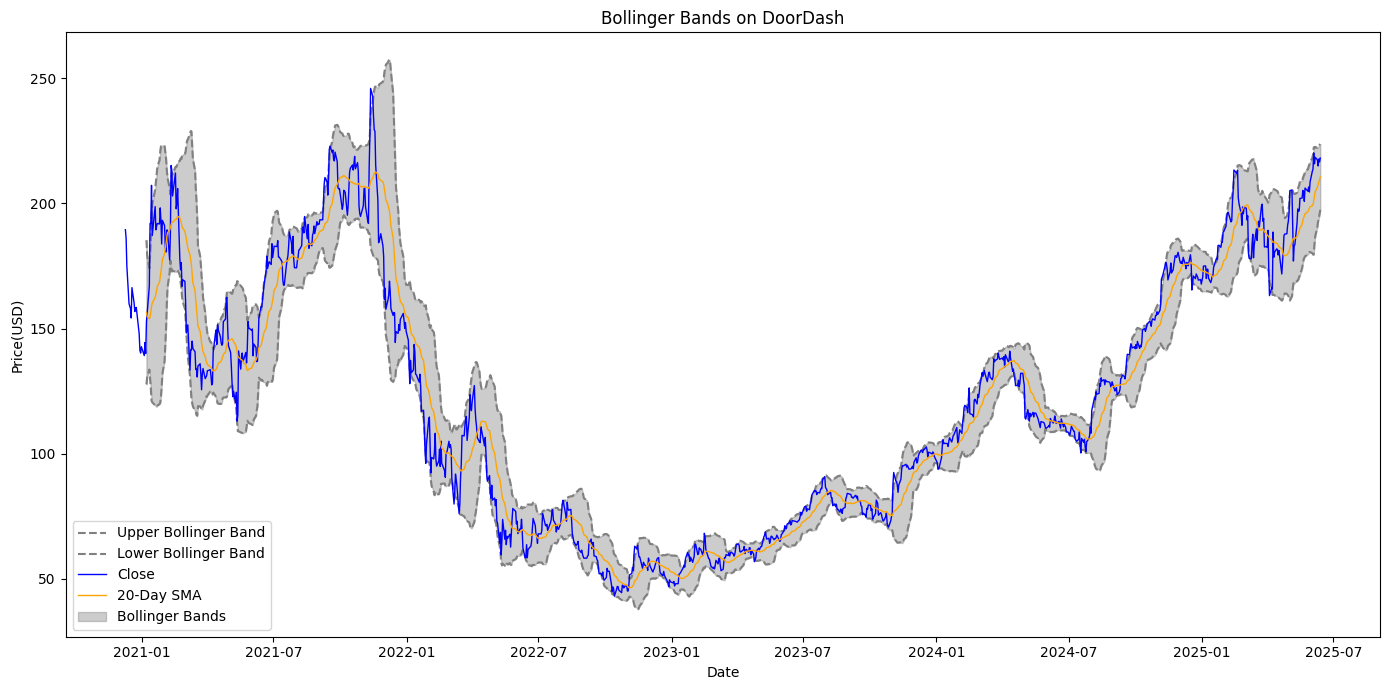

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(df.Upper_BB, label="Upper Bollinger Band", color="grey", linestyle="--")
plt.plot(df.Lower_BB, label="Lower Bollinger Band", color="grey",linestyle="--")
plt.plot(df.index, df["Close"], label="Close", color="blue", linewidth=1)
plt.plot(df.index, df["20Day_SMA"], label="20-Day SMA", color="orange", linewidth=1)
plt.fill_between(df.index, df["Upper_BB"], df["Lower_BB"], color="gray", alpha=0.4, label="Bollinger Bands")
plt.title("Bollinger Bands on DoorDash")
plt.xlabel("Date")
plt.ylabel("Price(USD)")
plt.legend()
plt.tight_layout()
plt.show()

<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>

- The 20-Day SMA effectively smoothed daily price noise and revealed sustained trend structures. A pronounced upward shift emerged from late 2023 through mid-2025, aligning with improved investor sentiment and consistent recovery momentum.
- The dynamic width of the Bollinger Bands provided a visual proxy for volatility. Bands expanded sharply during periods of elevated uncertainty — particularly during the sharp corrections of 2021–2022 — and contracted significantly by mid-2023, reflecting stabilization and a compression in market risk.
- Price movements that touch or break the upper band suggest overbought conditions, while dips below the lower band may indicate oversold levels. The closing price is mostly within the Bollinger Band which indicates a reasonable stock closing price of DoorDash.



<span style="color: orange">Volume and Volatility Subplots</span>


To understand DoorDash’s market dynamics beyond just price, we plotted `Daily Trading Volume` and `20-Day Rolling Volatility` as two vertically stacked subplots. These visualizations help reveal patterns in trading activity and market risk over time.

First, we created a figure with two subplots stacked vertically (2, 1). Both subplots share the same x-axis (sharex=True) to align time scales.

Then we plotted the daily trading volume in <span style="color:purple"><strong>purple</strong></span> in the upper subplot.

Later, we plotted the 20-day rolling volatility in <span style="color:green"><strong>green</strong></span> in the lower subplot, measuring the stock's risk over time.


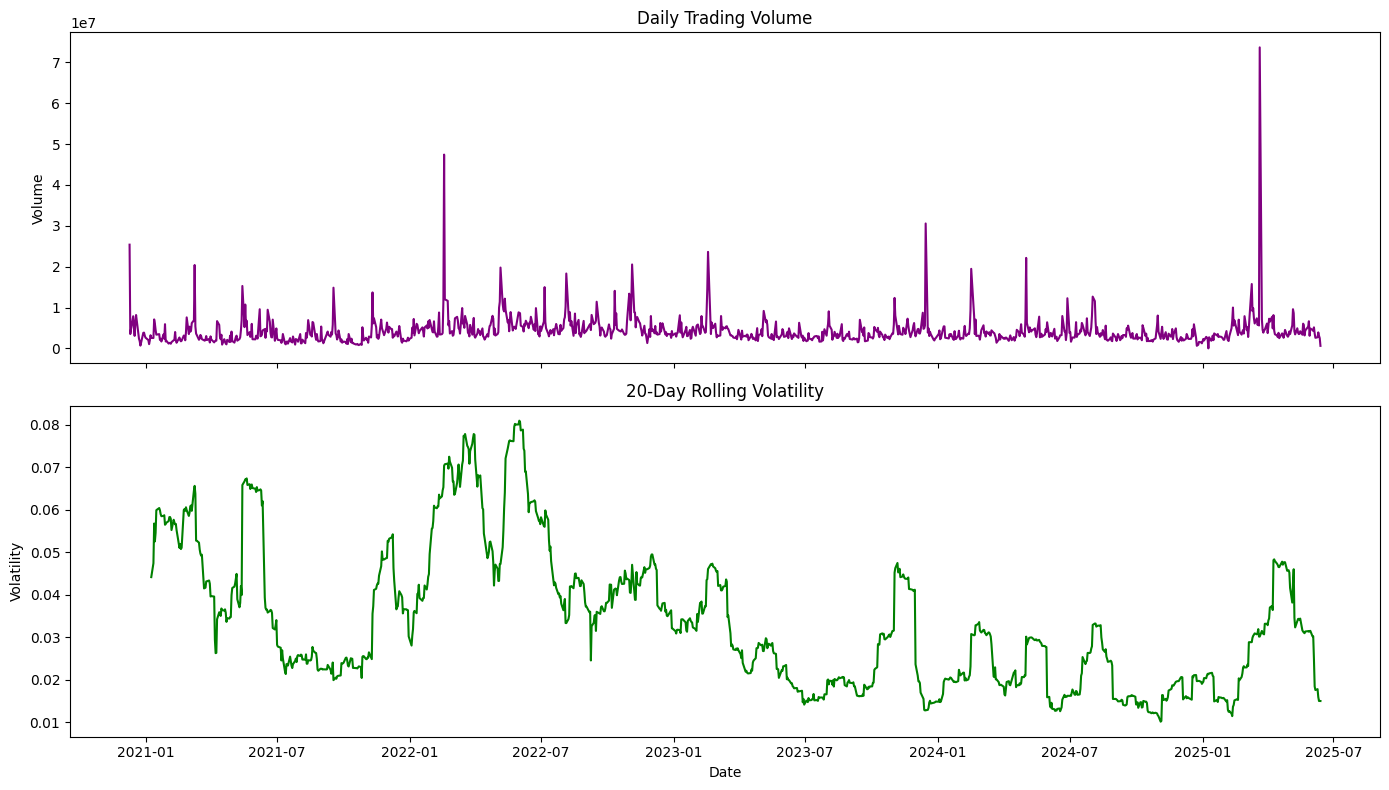

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
ax1.plot(df.index, df["Volume"], color="purple")
ax1.set_title("Daily Trading Volume")
ax1.set_ylabel("Volume")
ax2.plot(df.index, df["20Day_Volatility"], color="green")
ax2.set_title("20-Day Rolling Volatility")
ax2.set_ylabel("Volatility")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>

- Large spikes in volume are clearly visible in early 2022, late 2023, and early 2025. These likely correspond to major events such as earnings, market sentiment shifts, or institutional rebalancing. The massive spike in early 2025 signals heightened market activity and is consistent with the price breakout observed.

- Volatility peaked during high-uncertainty phases such as 2021–2022 and dropped significantly by mid-2023. The smoother volatility profile in 2023 and 2024 suggests a more stable trading environment.

- By aligning these charts, we can see how volume surges often coincide with spikes in volatility, indicating turbulent market periods. Conversely, low volatility combined with moderate volume reflects calm market conditions, possibly driven by long-term holders.


### <span style="color: orange;"> Histogram Chart</span>

<span style="color: orange">Histogram of Log Returns</span>

To assess the distribution and frequency of DoorDash’s daily log returns, we created a histogram. This visualization helps us evaluate the symmetry, skewness, and tail behavior of the return distribution. 

First, we calculated the number of bins using the square root rule, a common heuristic for histogram bin size to balance resolution and smoothness. We have calculated 33 bins.


Then we plotted the histogram of the `Log_Returns` column using 33 bins which shows the frequency of return values across different intervals.


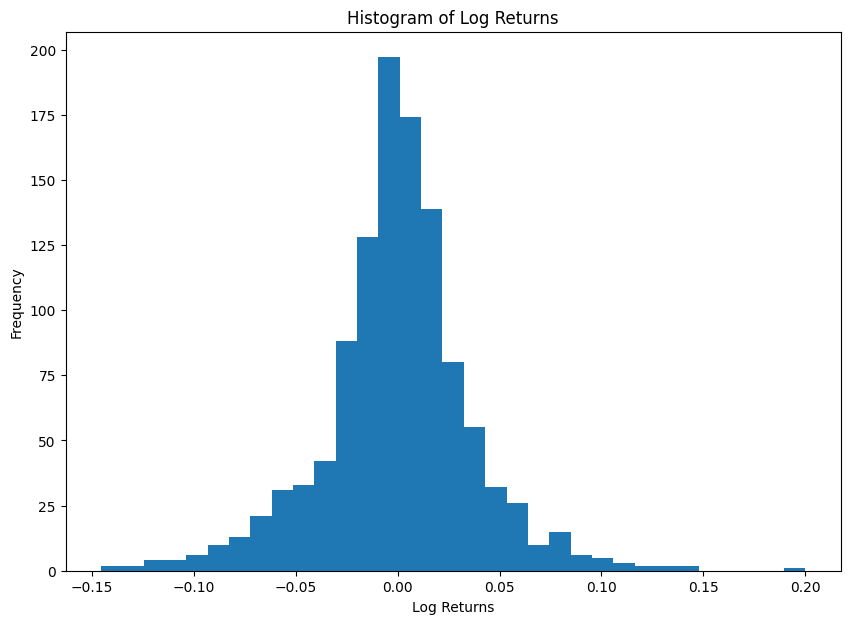

In [32]:
recommended_bins = int(np.sqrt(len(df.Log_Returns)))
recommended_bins # is 33

plt.figure(figsize=(10, 7))
plt.hist(df.Log_Returns, bins=recommended_bins)
plt.title("Histogram of Log Returns")
plt.ylabel("Frequency")
plt.xlabel("Log Returns")
plt.show()



<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>

- The distribution of log returns is centered around 0, reflecting that most daily price movements are small and balanced in either direction.
- The shape approximates a normal distribution, but exhibits mild negative skew, indicating that large downward movements occur slightly more often than large upward ones.
- The tails are heavier than those of a perfect normal distribution, suggesting the presence of occasional extreme return days, which aligns with earlier surge/drop analyses.
- Most returns fall within the range of approximately -5% to +5%, reinforcing the earlier finding that high-magnitude changes are rare.

Overall, the histogram supports the inference that while DoorDash stock generally behaves like a typical equity instrument with small daily fluctuations.

### <span style="color: orange;"> Scatter Plot Chart</span>



<span style="color: orange;">Scatter Plot: Volume vs Daily Return</span>

This scatter plot visually explores the relationship between trading volume and daily return volatility for DoorDash. Each dot represents a single trading day, with the x-axis showing the simple daily return and the y-axis indicating trading volume.

We generated the scatter plot using daily returns on the x-axis and trading volume on the y-axis. Each dot represents a unique trading day.


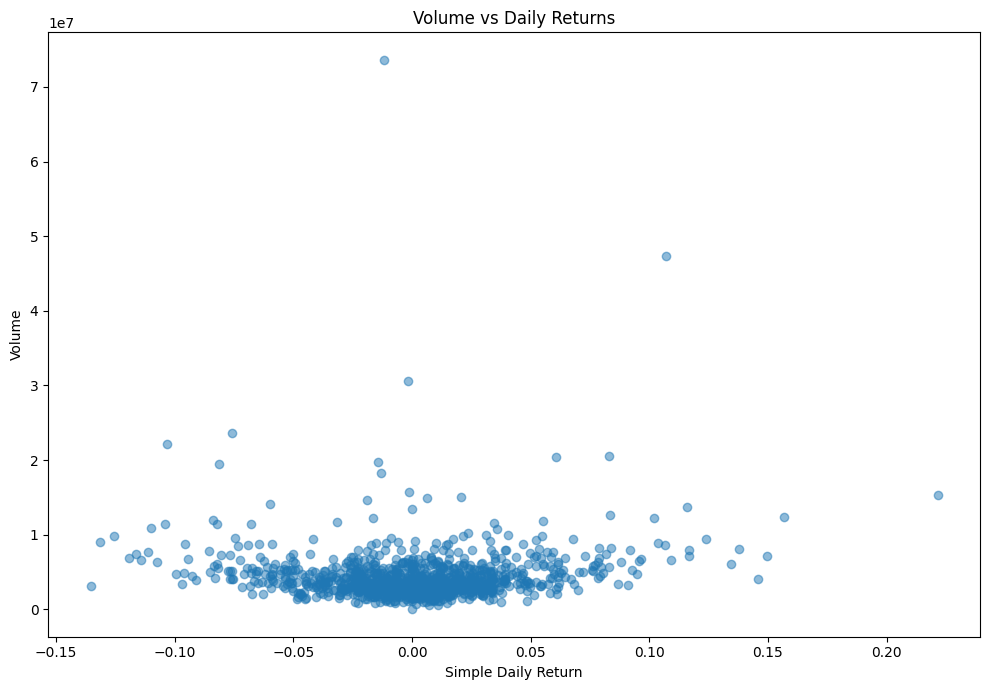

In [33]:
plt.figure(figsize=(10, 7))
plt.scatter(df.SimpleDailyReturns, df.Volume, alpha=0.5)
plt.title("Volume vs Daily Returns")
plt.ylabel("Volume")
plt.xlabel("Simple Daily Return")
plt.tight_layout()
plt.show()

<span style="color: blue;"><strong><em>Interpretation:</em></strong></span>

- The majority of data points are concentrated near zero returns with moderate volume, indicating that most trading days are relatively uneventful in both price movement and market participation. This is a hallmark of market stability.

- High-volume outliers points show unusually high trading volume associated with large positive or negative returns. These likely represent reactionary trading days, driven by events such as earnings announcements and etc.

- There is asymmetry in reaction. Interestingly, high-volume spikes are present on both ends of the return spectrum. This suggests that investors react with comparable intensity to both positive and negative catalysts, highlighting the stock’s sensitivity to information flow.

- There is weak linear relationship as there is no consistent directional correlation between volume and returns meaning higher volume doesn't reliably predict direction. However, it does signal magnitude, with large volumes often preceding or following major price shifts.


### <span style="color:orange"><strong>Summary</strong></span>


The data visualizations provided a comprehensive lens into DoorDash’s trading behavior over time, revealing key dynamics across price trends, volatility shifts, and volume surges. 

- **The line chart** with the 20-Day SMA and Bollinger Bands showed clear trend phases — with a pronounced recovery from late 2023 through 2025 — and visually captured overbought or oversold moments through band interactions. 

- **The subplots** of daily volume and rolling volatility uncovered clusters of heightened market activity and stress, particularly during the 2021–2022 correction and in early 2025, where volatility surged alongside price momentum. 

- **The histogram** of log returns reinforced a near-normal distribution with occasional extreme returns, highlighting the balance between stability and sudden risk.

- **The scatter plot** between volume and daily returns revealed that while most activity clusters around moderate values, sharp outliers often reflect event-driven surges or institutional trades. 

Collectively, these visuals helped translate raw metrics into actionable insights, confirming that DoorDash has transitioned from high post-IPO volatility into a more structured trading profile — one where both risks and opportunities can be anticipated more clearly through visual patterns.



## <h2 style="color:green"> Conclusions and Recommendations </h2>

### <span style="color: orange;"> Analyst 1 </span>

Through our structured financial analysis, we identified several key patterns in DoorDash’s performance from its IPO in December 2020 through June 2025. First, the histogram of log returns validated that returns were mostly stationary and symmetrically distributed around zero which indicates a healthy risk-return profile over time. Volatility, while elevated during certain periods (around 2021 and 2022), was not insistently high. The 20-day rolling standard deviation revealed a clear decline in recent periods which indicating an increased price stability. Momentum indicators, specifically the 20-day momentum and SMA crossovers, emphasized several sustained upward trends in mid-2023 and early 2025. These momentum phases suggest recovery periods and investor confidence regain. Finally, the stabilizing volatility and moderate log-return distribution paints a picture of a maturing asset that is transitioning towards a greater structural stability.

Given this combined evidence of declining volatility, positive momentum and balanced return distribution, **I recommend that the firm increase its stake in DoorDash (DASH)**. The stock has evolved from a volatile post-IPO equity into a more resilient and technically favourable investment opportunity.



### <span style="color: orange;"> Analyst 2 </span>
The analysis of DoorDash's stock performance from its IPO through mid-2025 presents a mixed but cautiously optimistic investment profile. The 20-day simple moving average and Bollinger Bands indicate that while DASH has experienced some significant fluctuations, its price tends to revert toward longer-term trend lines, suggesting mean reverting behaviour and resilience. The volatility chart shows periods of elevated risk, particularly during 2022 and 2023, yet recent volatility has decreased, pointing toward greater price stability. Logarithmic return analysis further confirms a near normal distribution with heavy tails, signifying the potential for rare but impactful price shocks. The identification of volume spikes and price surges shows that the stock is periodically influenced by external events or market sentiment, which could present both risk and short-term opportunity.

Importantly, there is no strong correlation between trading volume and daily returns, as seen in the scatter plot, suggesting that price movement is not solely driven by liquidity but also by fundamental or speculative catalysts. Despite past volatility, the stock has demonstrated a recovery trend and steady upward momentum over longer windows. For a growth oriented investment strategy, DoorDash remains a viable candidate. Therefore, **I recommend to increase the stake in DASH**, while continuing to monitor macroeconomic conditions, industry competition, and volatility signals closely.

### <span style="color: orange;"> Analyst 3 </span>
Our team examined DoorDash's (ticker: DASH) stock performance December 2020 (IPO) to June 2025. The closing price chart with 20-day SMA and 20-day Bollinger Bands depicts increasing Close prices starting July 2021, which peaked at the end of the year/beginning of 2022. Throughout the time frame, the price line remained above the SMA, and the bands were relatively narrow, most likely due to the gradual lifting of lockdown restrictions imposed during the COVID-19 and the revival of retail, alongside an increase in demand for food delivery services.

Despite price fluctuations in early 2022, the trend reversed mid-2022 onwards, reflecting DoorDash's success in capitalising on this trend and efforts in diversifying towards groceries and convenience goods. Further supported by the fact that the log return distribution (shown in the histogram) is roughly normally distributed, with most returns clustering close to zero, suggesting  price stability. On the basis of good signs of recovery, the proper implementation of the business plan, and steady trading behaviour, **it is advisable to increase the company's investment holdings in DoorDash**.

### <span style="color: orange;"> Analyst 4 </span>
Based on the comprehensive analysis and visualisations of DoorDash's stock performance from its IPO in December 2020 through June 2025, I believe the company presents a strengthening investment profile supported by improving technical indicators and stabilized trading behavior. The Close Price chart with 20-Day SMA and Bollinger Bands highlights a significant upward trend beginning in late 2023, accompanied by narrowing bands, which indicates reduced volatility and increased price confidence. This pattern aligns with post-pandemic recovery and growing institutional maturity.

Supporting plots further reinforce this assessment: the volume and rolling volatility charts show that although DoorDash experienced turbulent phases in 2021–2022, volatility declined markedly by 2023–2024, reflecting a more stable trading environment. The histogram of log returns shows a near-normal distribution with fat tails, implying that while the stock is typically stable, it remains susceptible to occasional external shocks. Finally, the scatter plot between volume and daily returns reveals that although no strong directional correlation exists, high-volume outliers occur at both ends of the return spectrum, indicating event-driven investor reactions. Overall, these signals suggest that DoorDash has evolved from a high-volatility post-IPO stock into a resilient asset with growth potential. **I recommend the firm increase its stake in DASH**, while maintaining awareness of occasional volatility spikes tied to market sentiment or macro events.

### <span style="color: orange;"> Analyst 5 </span>
Our in-depth analysis of DoorDash's stock performance shows the path of DoorDash from evolution to maturation. The data visualizations and indicators collectively indicated that stock has transitioned from the wild swings of post-IPO volatility to a more predictable and structured trading pattern. This transformation is particularly evident in the latter half of our analysis period, where reduced volatility and stabilized returns suggest that the market has gained a clearer consensus on DoorDash's valuation and growth. The recovery from late 2023 through 2025, as captured by 20Day-SMA and Bollinger Band, aligns with positive fundamental developments in the company's business operations and the broader food-delivery sector. The increased activity during the 2021–2022 market correction and the early 2025 volatility surge alongside price momentum highlight periods where external macroeconomic factors and company-specific news significantly influenced trading behavior. These spikes in volume and volatility often precede or follow major price shifts. The plot reinforces  that DoorDash's stock generally adheres to typical equity behavior, with most daily price movements being small and balanced. However, the mild negative skew and heavier tails in the distribution serve as reminders of the stock's susceptibility to occasional extreme return events. 

While the stock demonstrates resilience with effective recovery capabilities, the occasional extreme return days and sensitivity to macro events reveal the need for cautious attention. For firms with a long-term investment horizon and appetite for growth-oriented equities in the food-delivery sector, **incrementally increasing stakes in DoorDash is a right investment choice**, particularly during periods of market dip. However, given the inherent risks of equity investments and potential for sudden volatility resurgences, position sizing should adhere to portfolio diversification principles and risk management protocols.

### <span style="color: orange;"> Analyst 6 </span>
From a risk managed investment perspective, DoorDash’s post-IPO performance shows increasing signs of technical maturity and trend reliability. The consistent narrowing of Bollinger Bands and declining 20-day rolling volatility, especially from 2023 onward, point to a significant reduction in price turbulence and shifting the stock to a more stable one. The 20-day simple moving average effectively tracked price recoveries in early 2025. Additionally, the histogram of log returns confirms the absence of skewed distributions, supporting the idea that returns are becoming more predictable. These technical signals collectively reduce downside risk and make the stock more attractive under risk-adjusted performance measures.

Quantitative diagnostics reveal that DoorDash exhibits a unique decoupling between volume and return behavior. In the scatter plot minimal correlation is shown between the two. This suggests that price shifts are not just about liquidity but influenced by structural signals, such as operational shifts or external market sentiment. The presence of isolated volume increases, and this implies event driven volatility, which is further captured in the heavy tails of the log return histogram. While these anomalies require attention, their infrequency combined with the overall symmetry of return distribution and a recovering momentum trend supports the view that DASH is progressing toward technical resilience. I **recommend the firm moderately increase its position in DASH** while arranging monitoring triggers tied to event volatility.